## Proof of Concept
- convert text to frequency that represents changes in format
- split text based on "major" changes in frequency

In [1]:
%config IPCompleter.greedy=True

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import re
import numpy as np

from faker import Faker

In [4]:
%%html

<h5>1. setup</h5>

In [5]:
fake = Faker()

In [6]:
document = '\n'

for _ in range(10):
    l = np.random.randint(5, 15)
    document += '  ' + fake.word() + ':  ' + fake.sentence(l) + '\n'

document += '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \
     + '     abc: 10     abc: 10     abc: 10    ' + '\n' \

print('example document:')
print('-----------------------------------------')
print(document)
print('-----------------------------------------')

example document:
-----------------------------------------

  mother:  Tree either call task until red push toward produce property if green eight set.
  service:  Everybody market argue center crime approach actually they would artist system and.
  everyone:  Because do guy walk claim sit reveal walk.
  grow:  Security improve situation we later pull save thank not edge in.
  state:  Probably money long six religious manage hear pass best work.
  treatment:  Situation of water though it war.
  report:  Final factor last care would I eight four.
  American:  Magazine will become third itself direction well party local concern site law word response.
  instead:  After front speech hope turn decade both worry.
  type:  Stop small job gas way memory south environment hundred lawyer staff bring decision option third full.

     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     abc: 10    

   

In [7]:
%%html

<h5>2. convert document to matrix</h5>

In [8]:
import sys

sys.path.append('..')

from package.transformers import DocumentToMatrix

In [9]:
document_transformer = DocumentToMatrix.BasicDocumentToMatrix(document)
document_as_matrix = document_transformer.transform()

In [10]:
document_as_matrix

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
%%html

<h5>3. image / document</h5>

In [12]:
import matplotlib.pyplot as plt

In [13]:
%%html

<h5>view as image</h5>

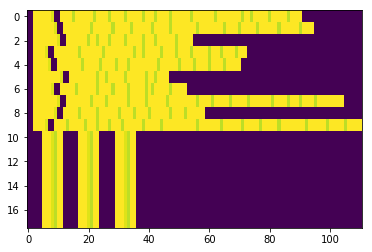

In [14]:
plt.imshow(document_as_matrix, aspect='auto')

In [15]:
%%html

<h5>view as time series</h5>

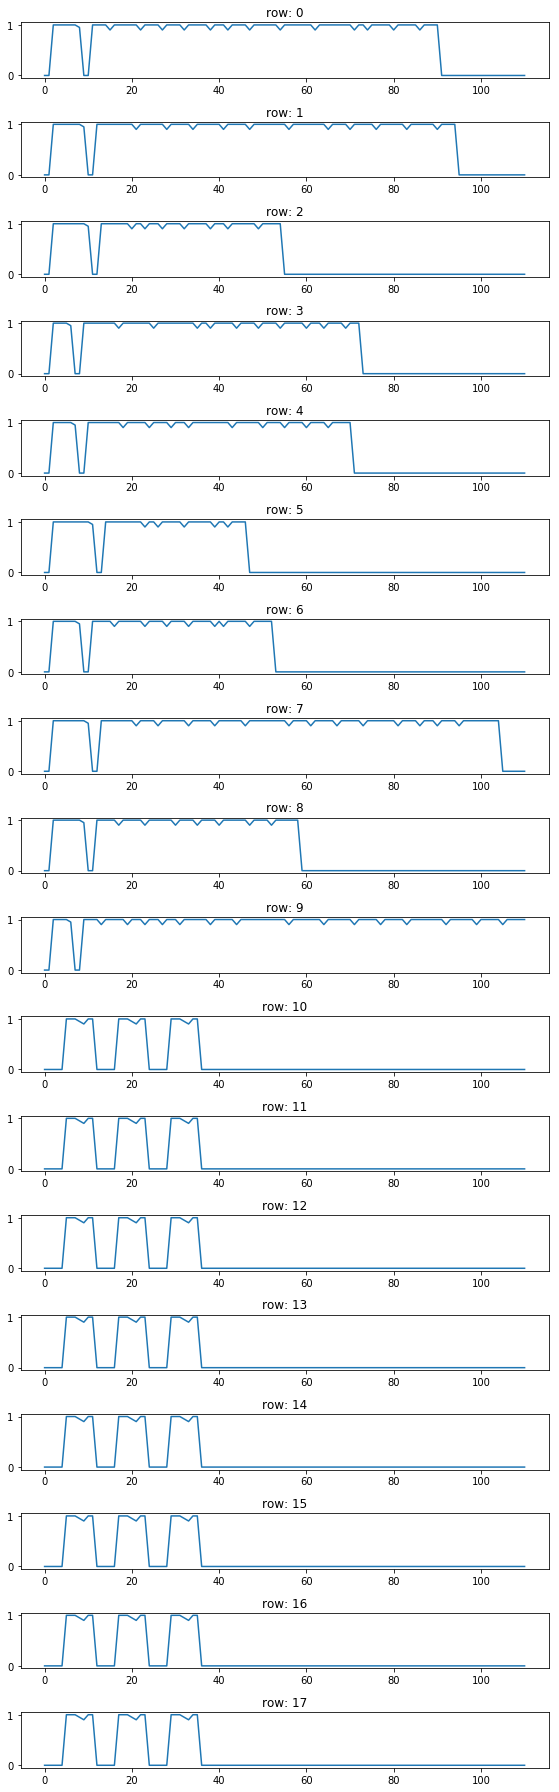

In [16]:
length, _ = document_as_matrix.shape
fig, axs = plt.subplots(length, 1, figsize=(8, 25))

for row in range(length):
    axs[row].plot(document_as_matrix[row, :])
    axs[row].set_title('row: ' + str(row))
    
fig.tight_layout()
fig.show()

In [17]:
%%html

<h5>split document</h5>

In [18]:
from package.estimators import CorrelationEstimator

In [19]:
estimator = CorrelationEstimator(document_transformer)
y = np.array(estimator.evaluate()).flatten().tolist()

y

[0.723066981299172,
 0.7236066009730276,
 0.4403515246869591,
 0.722636637608624,
 0.4302481707777014,
 0.4336565456395777,
 0.4536907252945405,
 0.7240236871927817,
 0.43823584665519644,
 0.04528437379453317,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999,
 0.9999999999999999]

In [20]:
from package.splitters import SingleThresholdSplitter

In [21]:
splitter = SingleThresholdSplitter(y, .35)
split_points = splitter.split_points

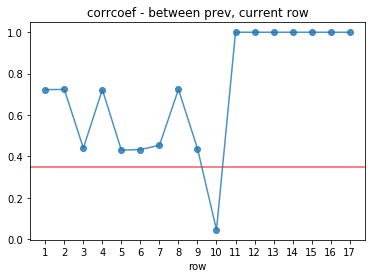

In [22]:
x_ticks = range(length)
plt.xticks(x_ticks)

plt.axhline(splitter.threshold, c = 'red', alpha = .65)

x = range(1, length)

plt.title('corrcoef - between prev, current row')
plt.xlabel('row')

plt.plot(x, y, '-o', alpha = .8)
plt.show()

In [23]:
sections = splitter.split_document(document_transformer.lines_in_document)
for index, section in enumerate(sections):
    print('section:', index+1)
    print('-->')
    print(section)
    print('<--')
    print()

section: 1
-->
  mother:  Tree either call task until red push toward produce property if green eight set.
  service:  Everybody market argue center crime approach actually they would artist system and.
  everyone:  Because do guy walk claim sit reveal walk.
  grow:  Security improve situation we later pull save thank not edge in.
  state:  Probably money long six religious manage hear pass best work.
  treatment:  Situation of water though it war.
  report:  Final factor last care would I eight four.
  American:  Magazine will become third itself direction well party local concern site law word response.
  instead:  After front speech hope turn decade both worry.
  type:  Stop small job gas way memory south environment hundred lawyer staff bring decision option third full.
<--

section: 2
-->
     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     abc: 10    
     abc: 10     abc: 10     ab